In [11]:
import pandas as pd
data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
data.head()
df = pd.DataFrame(data)


In [12]:
pd.isna(any(df))

False

In [13]:
any(df.duplicated())

True

In [14]:
df = df.drop_duplicates()

In [15]:
any(df.duplicated())

False

In [16]:
target = df['target']
features = df.drop('target', axis=1)

In [4]:
# import ydata profiling raport
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")

In [6]:
profile.to_file("output.html")


c:\ProgramData\Anaconda3\lib\site-packages\ydata_profiling\profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# import normalizer
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

df_scaled = pd.DataFrame(scaled, columns = features.columns)
df_scaled.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
count,1.190000e+03,1.190000e+03,1.190000e+03,1.190000e+03,1.190000e+03,1.190000e+03,1.190000e+03,1.190000e+03,1.190000e+03,1.190000e+03,1.190000e+03
mean,-2.627217e-16,8.359326e-17,-2.985474e-18,3.030256e-16,7.165137e-17,5.970947e-17,-2.388379e-17,-4.060244e-16,7.762232e-17,8.956421e-17,-3.582568e-17
std,1.000420e+00,1.000420e+00,1.000420e+00,1.000420e+00,1.000420e+00,1.000420e+00,1.000420e+00,1.000420e+00,1.000420e+00,1.000420e+00,1.000420e+00
min,-2.749564e+00,-1.798576e+00,-2.387770e+00,-7.197486e+00,-2.075047e+00,-5.209295e-01,-8.026723e-01,-3.125928e+00,-7.952189e-01,-3.244162e+00,-2.662017e+00
25%,-7.184065e-01,5.559954e-01,-2.489320e-01,-6.619309e-01,-2.205991e-01,-5.209295e-01,-8.026723e-01,-7.344195e-01,-7.952189e-01,-8.497924e-01,-1.023217e+00
50%,2.991489e-02,5.559954e-01,8.204870e-01,-1.173013e-01,1.838284e-01,-5.209295e-01,-8.026723e-01,3.007918e-02,-7.952189e-01,-2.972455e-01,6.155828e-01
75%,6.713332e-01,5.559954e-01,8.204870e-01,4.273283e-01,5.857899e-01,-5.209295e-01,1.496197e+00,7.945778e-01,1.257515e+00,6.236660e-01,6.155828e-01
max,2.488685e+00,5.559954e-01,8.204870e-01,3.695106e+00,3.872997e+00,1.919646e+00,1.496197e+00,2.441190e+00,1.257515e+00,4.859859e+00,2.254383e+00


<Axes: >

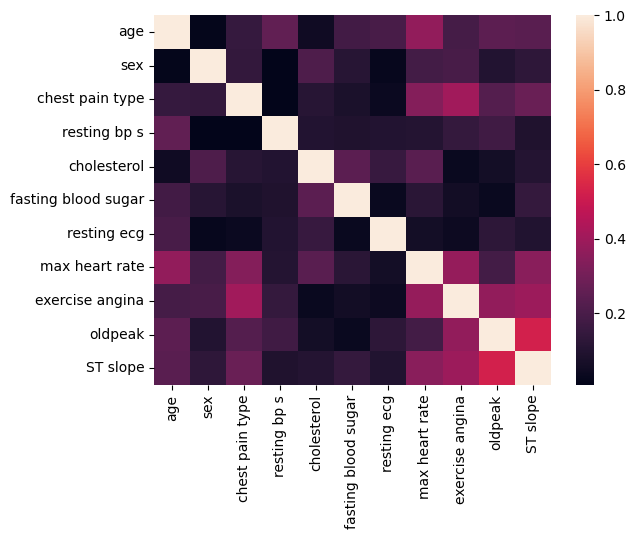

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(abs(df_scaled.corr()))


In [7]:
# correlation betwqeen features and target
df_scaled['target'] = target
df_scaled.corr()['target'].sort_values(ascending=False)


target                 1.000000
ST slope               0.505608
exercise angina        0.481467
chest pain type        0.460127
oldpeak                0.398385
sex                    0.311267
age                    0.262029
fasting blood sugar    0.216695
resting bp s           0.121415
resting ecg            0.073059
cholesterol           -0.198366
max heart rate        -0.413278
Name: target, dtype: float64

In [17]:
# ijmport minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(features)

df_scaled = pd.DataFrame(scaled, columns = features.columns)
df_scaled.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.520630,0.789760,0.750545,0.661983,0.329684,0.233115,0.301743,0.540911,0.404139,0.396291,0.545389
std,0.192502,0.407701,0.310344,0.092571,0.181400,0.423046,0.402984,0.179298,0.490992,0.121201,0.203114
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,1.000000,0.666667,0.600000,0.287313,0.000000,0.000000,0.422535,0.000000,0.295455,0.333333
50%,0.530612,1.000000,1.000000,0.650000,0.369818,0.000000,0.000000,0.549296,0.000000,0.363636,0.666667
75%,0.653061,1.000000,1.000000,0.700000,0.442786,0.000000,0.500000,0.676056,1.000000,0.465909,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
# create decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

classifier = DecisionTreeClassifier(criterion='entropy',random_state=1, min_samples_split=40)

X_train, X_test, y_train, y_test = train_test_split(df_scaled, target, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
accuracy_score(y_val, y_pred)


0.782608695652174